In [2]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
# Load Philadelphia County Census Block Group shapefile
data_path = '/Users/wooyongjung/homeless_philly_2024/data/tl_2022_42_bg/tl_2022_42_bg.shp'
census_bg = gpd.read_file(data_path)
census_bg = census_bg.to_crs(4326)
census_bg = census_bg[census_bg['GEOID'].str.startswith('42101')]
census_bg = census_bg[['GEOID', 'geometry']]


<Axes: >

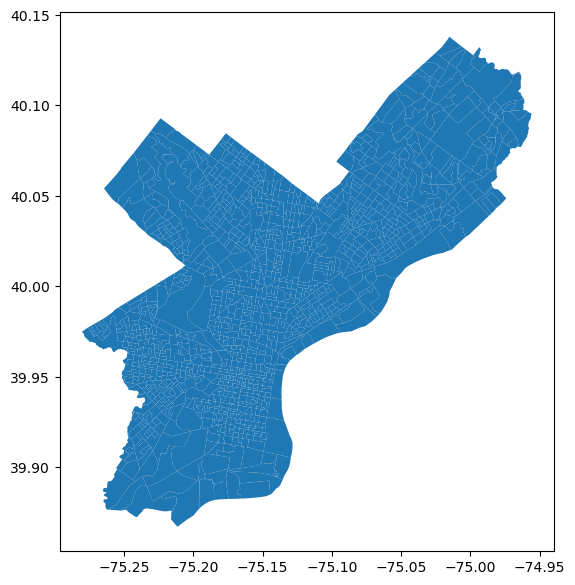

In [63]:
census_bg.plot(figsize=(7, 7))

In [45]:
# Load bbox dataset
df_bbox = pd.read_csv('data/df_bbox_99.csv')

# Select the rows with GEOID starting with 42101 (Philadelphia)
df_bbox['GEOID'] = df_bbox['GEOID'].astype(str)
df_bbox = df_bbox[df_bbox['GEOID'].str.startswith('42101')]

# Reset index
df_bbox.reset_index()

# Drop the first column Unnamed: 0
df_bbox = df_bbox.drop(['Unnamed: 0'], axis=1)

In [46]:
df_bbox.head()

,row_num,col_num,swne_edges,center_latlon,center_lat,center_lon,GEOID
749,4,37,"(39.86729385967965, -75.21316853623553, 39.868...","(39.86802059015158, -75.21222991179131)",39.868021,-75.212230,421019809017
926,5,36,"(39.86874039640407, -75.21505478030713, 39.870...","(39.86946714195741, -75.2141161561886)",39.869467,-75.214116,421019809017
927,5,37,"(39.868743869960085, -75.2131730240858, 39.870...","(39.86947060033819, -75.21223437999578)",39.869471,-75.212234,421019809017
928,5,38,"(39.86874731298889, -75.21129126753951, 39.870...","(39.86947402819094, -75.2103526034794)",39.869474,-75.210353,421019809017
1104,6,36,"(39.87019040614296, -75.21505930810041, 39.871...","(39.87091715160326, -75.21412066433606)",39.870917,-75.214121,421019809017


In [47]:
df_bbox['swne_edges'] = df_bbox['swne_edges'].apply(lambda x: x[1:-1].split(','))

In [48]:
df_bbox.reset_index(inplace=True, drop=True)

In [49]:
df_bbox.head()

,row_num,col_num,swne_edges,center_latlon,center_lat,center_lon,GEOID
0,4,37,"[39.86729385967965, -75.21316853623553, 39.8...","(39.86802059015158, -75.21222991179131)",39.868021,-75.212230,421019809017
1,5,36,"[39.86874039640407, -75.21505478030713, 39.8...","(39.86946714195741, -75.2141161561886)",39.869467,-75.214116,421019809017
2,5,37,"[39.868743869960085, -75.2131730240858, 39.8...","(39.86947060033819, -75.21223437999578)",39.869471,-75.212234,421019809017
3,5,38,"[39.86874731298889, -75.21129126753951, 39.8...","(39.86947402819094, -75.2103526034794)",39.869474,-75.210353,421019809017
4,6,36,"[39.87019040614296, -75.21505930810041, 39.8...","(39.87091715160326, -75.21412066433606)",39.870917,-75.214121,421019809017


In [50]:
# Create coordinates
coords = []
for i in range(len(df_bbox)):
    coord = [(df_bbox['swne_edges'][i][1], df_bbox['swne_edges'][i][0]),
             (df_bbox['swne_edges'][i][3], df_bbox['swne_edges'][i][0]),
             (df_bbox['swne_edges'][i][3], df_bbox['swne_edges'][i][2]),
             (df_bbox['swne_edges'][i][1], df_bbox['swne_edges'][i][2])]
    coords.append(coord)

df_bbox['coords'] = coords

In [51]:
df_bbox.head()

,row_num,col_num,swne_edges,center_latlon,center_lat,center_lon,GEOID,coords
0,4,37,"[39.86729385967965, -75.21316853623553, 39.8...","(39.86802059015158, -75.21222991179131)",39.868021,-75.212230,421019809017,"[( -75.21316853623553, 39.86729385967965), ( -..."
1,5,36,"[39.86874039640407, -75.21505478030713, 39.8...","(39.86946714195741, -75.2141161561886)",39.869467,-75.214116,421019809017,"[( -75.21505478030713, 39.86874039640407), ( -..."
2,5,37,"[39.868743869960085, -75.2131730240858, 39.8...","(39.86947060033819, -75.21223437999578)",39.869471,-75.212234,421019809017,"[( -75.2131730240858, 39.868743869960085), ( -..."
3,5,38,"[39.86874731298889, -75.21129126753951, 39.8...","(39.86947402819094, -75.2103526034794)",39.869474,-75.210353,421019809017,"[( -75.21129126753951, 39.86874731298889), ( -..."
4,6,36,"[39.87019040614296, -75.21505930810041, 39.8...","(39.87091715160326, -75.21412066433606)",39.870917,-75.214121,421019809017,"[( -75.21505930810041, 39.87019040614296), ( -..."


In [52]:
from shapely.geometry import Polygon, LineString, Point, MultiPolygon
# Apply Polygon to coords
df_bbox['geometry'] = df_bbox['coords'].apply(Polygon)

In [54]:
# Convert geometry to GeoDataFrame
df_bbox = gpd.GeoDataFrame(df_bbox, geometry=df_bbox['geometry'], crs=4326)

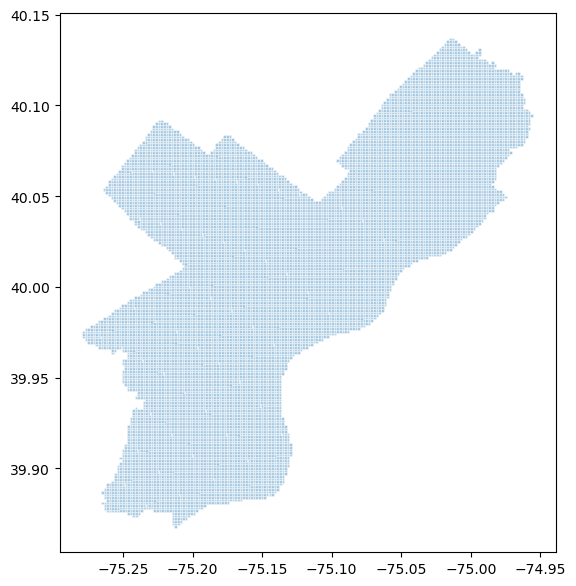

In [67]:
ax = df_bbox.plot(figsize=(7, 7), alpha=0.5, edgecolor='white')
plt.show()

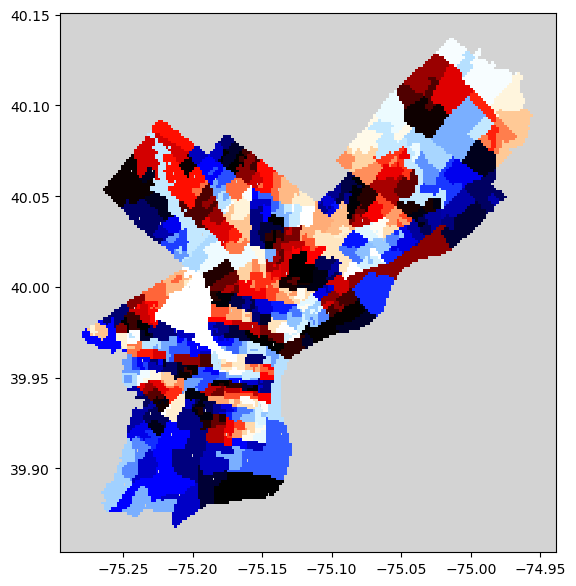

In [68]:
ax = df_bbox.plot(figsize=(7, 7), column='GEOID', cmap='flag')
ax.set_facecolor('lightgray')
plt.show()

In [78]:
df_bbox.shape

(14223, 9)

In [ ]:
# Aggregate the census_bg and df_bbox
eviction_bg = gpd.sjoin(census_bg, df_eviction_gpd, how='left', op='contains')